# Wind flags coloured by temperature

This is one cell notebook example that will help you plot wind flags that are coloured by temperature using Magics.

When plotting grib data we need to give magics indexes of x and y wind component, as well as index of parameter used for colouring the arrows (or flags).

One way of showing temperature advection is by colouring wind flags by temperature. If **wind_advanced_colour_parameter** is set to **"parameter"**, then Magics will use parameter that was given by **mnetcdf** or **mgrib**.

List of all **mwind** parameters you can find [in Magics documentation](https://confluence.ecmwf.int/display/MAGP/Wind+Plotting "Wind parameters").

### Installing Magics
If you don't have Magics installed, run the next cell to install Magics using conda.

In [ ]:
# Install Magics in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} Magics

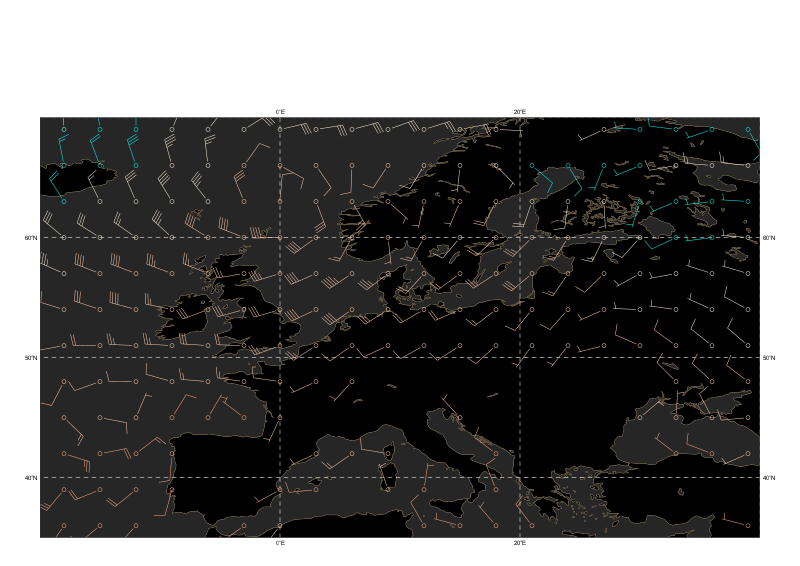

In [1]:
import Magics.macro as magics

# Setting the projection
projection = magics.mmap(
    subpage_clipping               = "on",
    subpage_map_projection         = 'cylindrical',
    subpage_lower_left_latitude    = 35.,
    subpage_lower_left_longitude   = -20.,
    subpage_upper_right_latitude   = 70.,
    subpage_upper_right_longitude  = 40.,
    page_id_line                   = "off"
)

# Defining the coastlines
black_background = magics.mcoast(
    map_coastline_sea_shade         = "on",
    map_coastline_land_shade_colour = "black",
    map_grid                        = "on",
    map_grid_line_style             = "dash",
    map_grid_colour                 = "white",
    map_coastline_land_shade        = "on",
    map_coastline_sea_shade_colour  = "rgb(0.15,0.15,0.15)",
    map_label                       = "on",
    map_coastline_colour            = "tan")

# Load the grib data
wind_with_t = magics.mgrib(
    grib_input_file_name = '../../data/tuv.grib', 
    grib_wind_position_1 = 1,
    grib_wind_position_2 = 2,
    grib_wind_position_colour=3)

# Defining Wind plotting
my_wind = magics.mwind(
    wind_field_type                          = "flags",
    wind_arrow_unit_velocity                 = 15,
    legend                                   = "off",
    wind_advanced_method                     = "on",
    wind_advanced_colour_parameter           = "parameter",
    wind_advanced_colour_selection_type      = "list",
    wind_advanced_colour_table_colour_method = "list",
    wind_flag_min_speed                      = 2.0, 
    wind_advanced_colour_list                = ['#ffffff','#ceffff','#91ffff','#00ffff','#ffefd5',
                                                '#ffccab','#ffa981','#ff835a','#ff5832','#ff0000'],
    wind_advanced_colour_level_list          = [253.,258.,263.,268.,273.,278.,283.,288.,293.,298.,303.],
    wind_arrow_thickness                     = 1,
    wind_arrow_legend_text                   = "  m/s"
    )

magics.plot(projection, black_background, wind_with_t, my_wind)